In [1]:
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt
import Single_qubit_design as sqd
import QCreator.auxiliary_functions as auxfuncs
import QCreator.elements as elements

In [20]:
reload(sqd)

<module 'Single_qubit_design' from 'C:\\Python\\Github\\QCreator\\designs\\Single_qubit_design\\Single_qubit_design.py'>

In [2]:
sqd.sample.add(sqd.coaxmon1)
sqd.sample.draw_design()

In [19]:
sqd.sample.draw_design()
sqd.sample.watch()

In [3]:
g1,g2,res1= auxfuncs.draw_single_resonator_plus_qubit(sqd.sample,
                            sqd.coupler_start, sqd.central_line_y, sqd.coupler_length,
                             sqd.resonator_core,sqd.resonator_gap,sqd.resonator_ground,
                             sqd.tl_core, sqd.tl_gap, sqd.tl_ground, grounding_width=10,
                             closed_end_meander_length=2000,length_left=300,length_right=300,
                                min_bridge_spacing = None,
                              airbridge = None, object1=sqd.coaxmon1, port='coupler2',
                              open_end_length = None,
                              port_orientation='left', direction_orientation='down')

In [17]:
res1

[320, 2000.0, 807.7812975457623]

# Connect resonators into feedline

In [4]:
sqd.sample.connect_cpw(o1=sqd.p1, o2=g1, port1='port', port2='narrow', name='right TL', points=[])
sqd.sample.connect_cpw(o1=g2, o2=sqd.p2, port1='narrow', port2='port', name='right TL', points=[])

[CPW "right TL", l=2348.039]

In [21]:
sqd.sample.draw_design()
sqd.sample.watch()

In [7]:
sqd.sample.draw_cap()
for i,qubit in enumerate(sqd.sample.qubits):
    caps=sqd.sample.calculate_qubit_capacitance(cell= sqd.sample.qubit_cap_cells[i], qubit=sqd.sample.qubits[i],
                                       mesh_volume=10)

Gds file has been writen here:  C:\Python\Github\QCreator\designs\Single_qubit_design\1Q_test.gds
For 0 conductor total length is:  6973
For 1 conductor total length is:  1234
For 2 conductor total length is:  265
Sum : 8472
Data has been written into the file: C:\Python\Github\QCreator\designs\Single_qubit_design\mesh_4k_data
Time for fastcap job is:  0.5531435012817383
Capacitance results have been writen here:  C:\Python\Github\QCreator\designs\Single_qubit_design\mesh_4k_results
Capacitance value in:  nanofarads
[<map object at 0x000001D2D30DEC40>, <map object at 0x000001D2D30DECA0>, <map object at 0x000001D2D30DE2B0>]
      0     1     2
0  92.1 -21.9  -8.9
1 -21.9  29.8  -2.0
2  -8.9  -2.0  13.1


In [8]:
sys, connections, elements_ = sqd.sample.get_tls(cutoff=2e11)
f, delta, modes = sys.get_modes()
num_modes=18
(res_fr,kappa,_)=auxfuncs.search_for_resonators_qubits(f,delta,0,15)[:num_modes]

Resonance frequencies are, GHz/2pi: [4.36529607 9.14586504]
Kappas are, MHz/2pi: [1.93034326e-05 5.92137443e-01]
Quality factors are: [1.13070462e+08 7.72275521e+03]


In [9]:
f[:num_modes]/(2*np.pi)/1e9, delta[:num_modes]

(array([  4.36529607,   9.14586504,  18.33296319,  28.20614726,
         36.06570599,  38.44656664,  41.50726012,  53.01958056,
         53.93492152,  53.96254258,  60.17414011,  60.29067705,
         65.91788409,  75.21259711, 169.90809556, 323.78721843,
        463.10356116, 941.3080875 ]),
 array([ 1.21287044e+02,  3.72050928e+06,  1.81815574e+11,  3.64642282e+07,
         3.60102385e+11,  1.37716645e+11,  1.53156022e+11,  7.07785360e+11,
         4.13644703e+10, -4.12801289e+10, -8.25559392e+10, -8.19371512e+10,
        -2.54548884e+08,  6.14639041e+08,  8.42171079e+08,  6.00716878e+07,
         2.35658060e+06,  8.58183166e+12]))

In [12]:
sqd.sample.write_to_gds()

Gds file has been writen here:  E:\Github2.0\QCreator\designs\Single_qubit_design\1Q_test.gds


# Get s21 parameters

In [10]:
f_ = np.linspace(8.8e9, 9.3e9, 2001)
# s11 = sample.get_s21('p1', 'p1', f_)
s11 = sqd.sample.get_s21('pad-left-0', 'pad-right-0', f_)

..\..\QCreator\general_sample_creator.py:380: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s.append(np.linalg.lstsq(m, boundary)[0][a2[0]])


In [11]:
import resonator_tools
from resonator_tools.circuit import notch_port, reflection_port

In [12]:
fitter = notch_port(f_data=f_, z_data_raw=s11)
fitter.autofit()

C:\Users\di82dac\Anaconda3\envs\qcreator\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 200.
  warnings.warn(errors[info][0], RuntimeWarning)


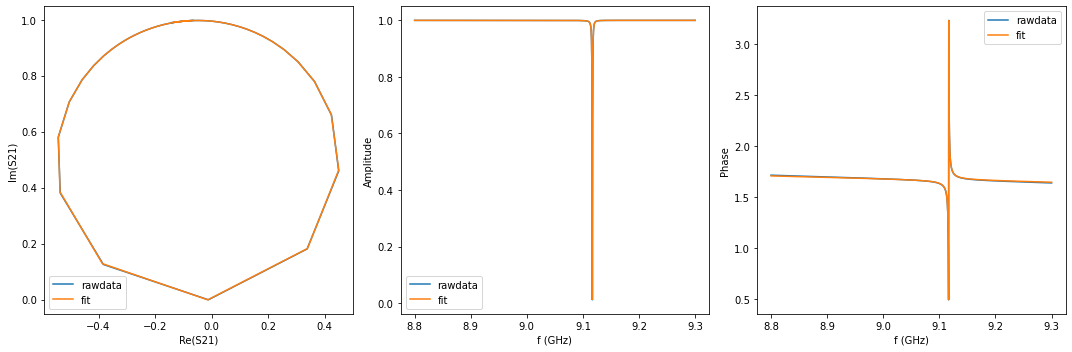

In [13]:
fitter.plotall()

In [14]:
fitter.fitresults

{'Qi_dia_corr': -4531880725.588617,
 'Qi_no_corr': -624624170.7766571,
 'absQc': 7856.704662886891,
 'Qc_dia_corr': 7856.789866936664,
 'Ql': 7856.803488048465,
 'fr': 9116744788.81901,
 'theta0': 3.136935474487189,
 'phi0': -0.004657179102604368,
 'chi_square': 1.662786160813795e-05,
 'delay': 2.129805372878206e-11,
 'a': 0.9998144275431923,
 'alpha': 2.8849544263735982}

# Estimate qubit-resonator parameters

In [15]:
rfr_ind=1
qfr_ind=0

In [16]:
auxfuncs.get_grounded_qubit_resonator_coupling(res1,sqd.coaxmon1,'coupler2',res_fr[rfr_ind],res_fr[qfr_ind])

{'g': (9.855956959407074e-08, 'MHz/2pi')}

In [18]:
auxfuncs.get_grounded_qubit_resonator_parameters(res1,sqd.coaxmon1,'coupler2',res_fr[rfr_ind],res_fr[qfr_ind],kappa[rfr_ind])

Qubit- resonator detuning: -4.780568973010877


{'g': (9.855956959407074e-08, 'MHz/2pi'),
 'alpha': (-609.1267083226138, 'MHz/2pi'),
 'chi': (-2.296473330278151e-19, 'MHz/2pi'),
 'T': (6.323524248485674e+20, 'us'),
 'protection ratio': 2.3526730649709115e+21}

In [42]:
print("From AWR protection ratio is:", kappa[rfr_ind]/kappa[qfr_ind])

From AWR protection ratio is: 202.7257395761178


# Tests